# Smartphone Price Prediction

In [435]:
import numpy as np
import pandas as pd

## Import Libraries

In [436]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [437]:
df = pd.read_csv('phones_data.csv')
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


## Check for missing data

In [439]:
df.isnull().sum()

,0
Unnamed: 0,0
brand_name,0
model_name,0
os,197
popularity,0
best_price,0
lowest_price,260
highest_price,260
sellers_amount,0
screen_size,2


# Drop the missing data

In [440]:
df.dropna(inplace=True)

In [441]:
df.isnull().sum()

,0
Unnamed: 0,0
brand_name,0
model_name,0
os,0
popularity,0
best_price,0
lowest_price,0
highest_price,0
sellers_amount,0
screen_size,0


## Statistical Summary

In [477]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,phone_age
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,729.238462,10203.064103,9214.326923,11751.229487,20.226923,6.060462,112.287179,4121.117949,4.867949
std,338.209052,9612.168455,8652.375633,11693.361223,22.330371,0.626583,117.754426,1406.849509,1.242900
min,2.000000,1036.000000,899.000000,1059.000000,2.000000,2.400000,4.000000,1500.000000,3.000000
25%,475.500000,3759.000000,3499.000000,3999.000000,4.000000,5.700000,32.000000,3174.000000,4.000000
50%,783.500000,5931.000000,5547.000000,6512.500000,11.000000,6.215000,64.000000,4000.000000,4.000000
75%,1017.250000,13904.250000,12425.500000,16057.750000,29.000000,6.500000,128.000000,5000.000000,5.000000
max,1224.000000,55338.000000,45799.000000,64999.000000,125.000000,8.100000,1000.000000,13000.000000,11.000000


## Feature Engineering

In [444]:
df.sample(20)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
791,791,Xiaomi,Redmi 9 3/32GB Grey NFC,Android,1151,4047.0,3795.0,4854.0,69,6.53,32.0,5020.0,6-2020
837,837,Xiaomi,Redmi Note 9 3/64GB Grey (no NFC),Android,465,4834.0,4773.0,4895.0,2,6.53,64.0,5020.0,7-2020
413,413,Samsung,Galaxy A6+ 3/32GB Gold (SM-A605FZDN),Android,205,7064.0,7032.0,7129.0,3,6.00,32.0,3500.0,5-2018
287,287,realme,C3 2/32GB Blue,Android,936,3296.0,3174.0,3399.0,10,6.50,32.0,5000.0,4-2020
1129,1129,Apple,iPhone 11 Pro 512GB Dual Sim Silver (MWDK2),iOS,564,36188.0,31899.0,50670.0,39,5.80,512.0,3190.0,10-2019
682,682,Motorola,One Hyper XT2027-1 4/128GB Deep Sea Blue,Android,531,8261.0,7999.0,8590.0,3,6.50,128.0,4000.0,3-2020
1212,1212,Apple,iPhone XR Dual Sim 128GB Black (MT192),iOS,765,22520.0,18399.0,24855.0,15,6.10,128.0,2942.0,11-2018
1061,1061,vivo,Y20 4/64GB Nebula Blue,Android,810,4732.0,4299.0,4999.0,40,6.51,64.0,5000.0,10-2020
470,470,Samsung,Galaxy Note20 5G SM-N981B 8/256GB Mystic Bronze,Android,730,21222.0,20230.0,28270.0,27,6.70,256.0,4300.0,8-2020
422,422,Samsung,Galaxy A70 2019 SM-A705F 6/128GB Black (SM-A70...,Android,611,8986.0,8449.0,9399.0,9,6.70,128.0,4500.0,4-2019


Create a phone_age feature from the by subtracting current_year and the year of the release date

In [446]:
from datetime import datetime

current_year = datetime.now().year
df['phone_age'] = current_year - df['release_date'].str.split('-', expand=True)[1].astype(int)

In [447]:
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,phone_age
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020,4
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020,4
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020,4
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020,4
5,5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.8,64.0,3400.0,6-2018,6


Get the color of the phone from the model_name feature

In [449]:
def extract_color(model_name):
    color_list = [
    'Red',
    'Green',
    'Blue',
    'Yellow',
    'Cyan',
    'Magenta',
    'Black',
    'White',
    'Gray',
    'Grey',
    'Orange',
    'Purple',
    'Brown',
    'Pink',
    'Violet',
    'Indigo',
    'Turquoise',
    'Teal',
    'Lime',
    'Maroon',
    'Olive',
    'Navy',
    'Silver',
    'Gold',
    'Charcoal',
    'Gradient',
    'Jade',
    'Gunmetal',
    'Copper'

]
    for color in color_list:
        if color.lower() in model_name.lower():
            return color
    return None

# Apply the function to create a new column
df['color'] = df['model_name'].apply(extract_color)

In [450]:
df

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,phone_age,color
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020,4,Black
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,4,Black
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,4,Black
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,4,Black
5,5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018,6,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1218,Apple,iPhone XS Max 512GB Space Gray (MT622),iOS,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,9-2018,6,Gray
1219,1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018,6,Gold
1220,1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,9-2018,6,Gold
1221,1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019,5,Black


In [451]:
df.isnull().sum()

,0
Unnamed: 0,0
brand_name,0
model_name,0
os,0
popularity,0
best_price,0
lowest_price,0
highest_price,0
sellers_amount,0
screen_size,0


In [455]:
drop_col=['release_date','model_name','Unnamed: 0']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,brand_name,os,color
0,ALCATEL,Android,Black
1,ALCATEL,Android,Black
2,ALCATEL,Android,Black
3,ALCATEL,Android,Black
5,Honor,Android,Black
...,...,...,...
1218,Apple,iOS,Gray
1219,Apple,iOS,Gold
1220,Apple,iOS,Gold
1221,HUAWEI,Android,Black


In [456]:
df[object_columns]

,brand_name,os,color
0,ALCATEL,Android,Black
1,ALCATEL,Android,Black
2,ALCATEL,Android,Black
3,ALCATEL,Android,Black
5,Honor,Android,Black
...,...,...,...
1218,Apple,iOS,Gray
1219,Apple,iOS,Gold
1220,Apple,iOS,Gold
1221,HUAWEI,Android,Black


In [457]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'brand_name':
['ALCATEL' 'Honor' 'Meizu' 'Nokia' 'OnePlus' 'realme' 'AGM' 'OPPO'
 'Blackview' 'Lenovo' 'UMIDIGI' 'Sharp' 'Ulefone' 'DOOGEE' 'Xiaomi' 'ZTE'
 'Oukitel' 'Cubot' 'Tecno' 'Coolpad' 'Archos' '2E' 'Motorola' 'LG'
 'Samsung' 'BlackBerry' 'HUAWEI' 'Vernee' 'Google' 'ASUS' 'Bluboo' 'CAT'
 'Philips' 'Vodafone' 'Microsoft' 'Elephone' 'HTC' 'vivo' 'Sigma mobile'
 'Sony' 'LEAGOO' 'Apple']

Unique values in 'os':
['Android' 'iOS' 'OxygenOS' 'EMUI' 'KAIOS']

Unique values in 'color':
['Black' 'Blue' 'Purple' 'White' 'Gray' 'Green' 'Charcoal' 'Gunmetal' None
 'Silver' 'Red' 'Orange' 'Gold' 'Grey' 'Gradient' 'Jade' 'Copper' 'Pink'
 'Navy' 'Yellow' 'Indigo' 'Brown']



# One-Hot encoding

In [458]:
df1 = pd.get_dummies(df, columns=object_columns)

In [459]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,...,color_Indigo,color_Jade,color_Navy,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_White,color_Yellow
0,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
1,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
2,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
3,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
5,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1219,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1220,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1221,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,5,False,...,False,False,False,False,False,False,False,False,False,False


## Feature Scaling

In [463]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ["popularity",'best_price','lowest_price','highest_price','sellers_amount','screen_size','memory_size','battery_size']
scaler = MinMaxScaler()
df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])


In [464]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,...,color_Red,color_Silver,color_White,color_Yellow,best_price_log,lowest_price_log,highest_price_log,sellers_amount_log,memory_size_log,battery_size_log
0,0.343699,0.012044,0.014031,0.011886,0.276423,0.456140,0.004016,0.043478,4,False,...,False,False,False,False,7.433075,7.333023,7.506592,3.610918,2.197225,7.601402
1,0.262684,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
2,0.243044,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
3,0.233224,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
5,0.056465,0.181006,0.216748,0.157022,0.000000,0.596491,0.060241,0.165217,6,False,...,False,False,False,False,9.293394,9.271624,9.314700,1.098612,4.174387,8.131825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.481640,0.451024,0.455755,0.365854,0.719298,0.510040,0.145565,6,False,...,False,False,False,False,10.210641,9.959442,10.315630,3.871201,6.240276,8.063063
1219,0.899345,0.398678,0.336726,0.419784,0.479675,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,10.029503,9.681531,10.236418,4.127134,4.174387,8.063063
1220,0.432079,0.433944,0.468597,0.510807,0.211382,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,10.110542,9.996067,10.425876,3.367296,4.174387,8.063063
1221,0.959083,0.143052,0.158129,0.139819,0.130081,0.677193,0.124498,0.195652,5,False,...,False,False,False,False,9.083075,8.987197,9.210340,2.944439,4.859812,8.229778


In [465]:
y_scaled = df1['best_price']
y_scaled

,best_price
0,0.012044
1,0.014125
2,0.014125
3,0.014125
5,0.181006
...,...
1218,0.481640
1219,0.398678
1220,0.433944
1221,0.143052


In [466]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,...,color_Red,color_Silver,color_White,color_Yellow,best_price_log,lowest_price_log,highest_price_log,sellers_amount_log,memory_size_log,battery_size_log
0,0.343699,0.012044,0.014031,0.011886,0.276423,0.456140,0.004016,0.043478,4,False,...,False,False,False,False,7.433075,7.333023,7.506592,3.610918,2.197225,7.601402
1,0.262684,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
2,0.243044,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
3,0.233224,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
5,0.056465,0.181006,0.216748,0.157022,0.000000,0.596491,0.060241,0.165217,6,False,...,False,False,False,False,9.293394,9.271624,9.314700,1.098612,4.174387,8.131825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.481640,0.451024,0.455755,0.365854,0.719298,0.510040,0.145565,6,False,...,False,False,False,False,10.210641,9.959442,10.315630,3.871201,6.240276,8.063063
1219,0.899345,0.398678,0.336726,0.419784,0.479675,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,10.029503,9.681531,10.236418,4.127134,4.174387,8.063063
1220,0.432079,0.433944,0.468597,0.510807,0.211382,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,10.110542,9.996067,10.425876,3.367296,4.174387,8.063063
1221,0.959083,0.143052,0.158129,0.139819,0.130081,0.677193,0.124498,0.195652,5,False,...,False,False,False,False,9.083075,8.987197,9.210340,2.944439,4.859812,8.229778


In [467]:
x = df1.drop(['best_price','highest_price','lowest_price'],axis=1)
x

,popularity,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,...,color_Red,color_Silver,color_White,color_Yellow,best_price_log,lowest_price_log,highest_price_log,sellers_amount_log,memory_size_log,battery_size_log
0,0.343699,0.276423,0.456140,0.004016,0.043478,4,False,False,True,False,...,False,False,False,False,7.433075,7.333023,7.506592,3.610918,2.197225,7.601402
1,0.262684,0.276423,0.456140,0.012048,0.043478,4,False,False,True,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
2,0.243044,0.276423,0.456140,0.012048,0.043478,4,False,False,True,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
3,0.233224,0.276423,0.456140,0.012048,0.043478,4,False,False,True,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
5,0.056465,0.000000,0.596491,0.060241,0.165217,6,False,False,False,False,...,False,False,False,False,9.293394,9.271624,9.314700,1.098612,4.174387,8.131825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.365854,0.719298,0.510040,0.145565,6,False,False,False,False,...,False,False,False,False,10.210641,9.959442,10.315630,3.871201,6.240276,8.063063
1219,0.899345,0.479675,0.719298,0.060241,0.145565,6,False,False,False,False,...,False,False,False,False,10.029503,9.681531,10.236418,4.127134,4.174387,8.063063
1220,0.432079,0.211382,0.719298,0.060241,0.145565,6,False,False,False,False,...,False,False,False,False,10.110542,9.996067,10.425876,3.367296,4.174387,8.063063
1221,0.959083,0.130081,0.677193,0.124498,0.195652,5,False,False,False,False,...,False,False,False,False,9.083075,8.987197,9.210340,2.944439,4.859812,8.229778


## Split the dataset

In [468]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

## Linear Regression

In [469]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [470]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [471]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.002316839542171765
Testing MSE: 6.70354216277026e+19
Training R2 Score: 0.9288098922542539
Testing R2 Score: -2.573238961385821e+21


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

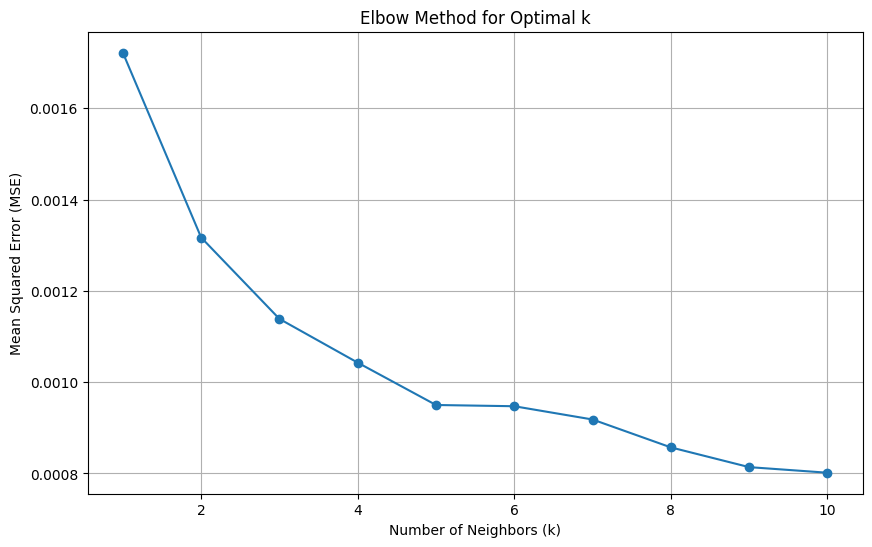

In [472]:
mse_values = []
r2_values = []
max_neighbors = 10
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [473]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 10


In [474]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [475]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [476]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.001649386197660999
Testing MSE: 0.0008016654587443522
Training R2 Score: 0.9493188980123477
Testing R2 Score: 0.9692270632100312
